# VGG-16 model

In [1]:
from keras.applications import vgg16
from keras.models import Model
import keras

Using TensorFlow backend.
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [2]:
batch_size = 30
epochs = 30
input_shape = (150, 150, 3)

In [3]:
import import_ipynb
from Dataset_utils import *

train_imgs_scaled, validation_imgs_scaled = get_imgs_scaled()
train_labels_enc, validation_labels_enc = get_labels_enc()

importing Jupyter notebook from Dataset_utils.ipynb


In [4]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 156s 3us/step


In [5]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

In [6]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

c:\users\sanke\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001CC45804D88>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000001CCCBB1B488>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000001CCCBB97988>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000001CCCBBE20C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000001CCCBBE27C8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000001CC458049C8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000001CCCBC50A08>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000001CCCBC503C8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000001CCCBC81908>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000001CCCBCA10C8>,block3_conv3,False


(1, 4, 4, 512)


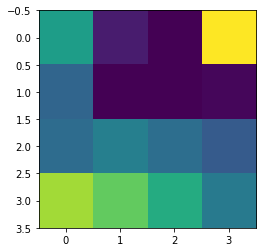

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [8]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

In [9]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)
print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [10]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

In [11]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 10s 3ms/step - loss: 0.4454 - acc: 0.7837 - val_loss: 0.3665 - val_acc: 0.8300
Epoch 2/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2899 - acc: 0.8760 - val_loss: 0.2895 - val_acc: 0.8680
Epoch 3/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2421 - acc: 0.9007 - val_loss: 0.2852 - val_acc: 0.8720
Epoch 4/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1960 - acc: 0.9203 - val_loss: 0.2916 - val_acc: 0.8820
Epoch 5/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1633 - acc: 0.9337 - val_loss: 0.3097 - val_acc: 0.8750
Epoch 6/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1452 - acc: 0.9427 - val_loss: 0.3030 - val_acc: 0.8810
Epoch 7/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1198 - acc: 0.9517 - 

In [15]:
# save model
model.save('pre_trained_tlearn.h5')
# save history
import pickle
f = open('pre_trained_tlearn.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [16]:
# load history
import pickle
file = 'pre_trained_tlearn.pckl'
f = open(file, 'rb')
hist = pickle.load(f)
f.close()

importing Jupyter notebook from model_summary.ipynb


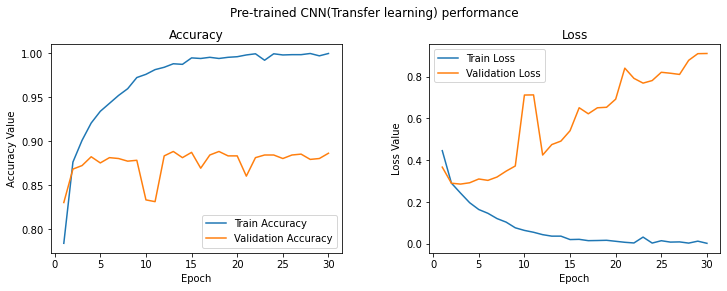

In [17]:
# plot graph
import import_ipynb
from model_summary import *
performance = 'Pre-trained CNN(Transfer learning) performance'
plot_graph(performance, hist, 30)